In [92]:
import nltk
from nltk.corpus import gutenberg
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [93]:
space_words = open('/content/sample_data/space_text.txt')
space_words = space_words.read()
words = nltk.word_tokenize(space_words)

import string

all_punctuation = string.punctuation + "\n\xa0«»\t—…--'``''"

remove_punctuation = str.maketrans('', '', all_punctuation)
words = [x for x in [t.translate(remove_punctuation).lower() for t in words] if len(x) > 0]

word_count = len(words)

print('Кол-во слов: ', word_count)
unique = []
for word in words:
  if word not in unique: 
    unique.append(word)
print('Кол-во уникальных слов: ', len(unique))
print(f"Длина текста {len(space_words)}")


Кол-во слов:  5868
Кол-во уникальных слов:  1547
Длина текста 37457


In [94]:
# https://habr.com/ru/post/536858/
text = nltk.Text(words)
lexical_diversity = (len(set(text)) / len(text)) * 100
print('лексическое разнообразие текста.', lexical_diversity)

лексическое разнообразие текста. 26.363326516700752


In [95]:
sent_count = len(nltk.sent_tokenize(space_words))
print('Кол-во предложений: ', sent_count)

Кол-во предложений:  294


In [96]:
# убрать стоп слова
import nltk
from nltk.corpus import stopwords


english_stopwords = stopwords.words("english")
# english_stopwords.extend(["'s", "a", "mr.", "mrs.", "miss"])
english_stopwords.extend(["�", "'s", "d."])

text = space_words
tokens = nltk.word_tokenize(text.lower())
tokens = [token for token in tokens if token not in english_stopwords and token not in all_punctuation]
print(tokens)

['mars', 'rovers', 'past', 'present', 'future', 'princeton', 'space', 'studies', 'institute', '20th', 'anniversary', 'conference', '10', 'may', '1997', 'donna', 'l.', 'shirley', 'jet', 'propulsion', 'laboratory', 'california', 'institute', 'technology', 'ms', '264-255', '4800', 'oak', 'grove', 'drive', 'pasadena', 'california', '91109', 'e-mail', 'dshirley', 'jpl.nasa.gov', 'phone', '818', '354-6277', 'fax', '818', '393-6800', 'jacob', 'r.', 'matijevic', 'jet', 'propulsion', 'laboratory', 'california', 'institute', 'technology', 'ms', '230-235', '4800', 'oak', 'grove', 'drive', 'pasadena', 'california', '91109', 'e-mail', 'jacob', 'r.matijevic', 'jpl.nasa.gov', 'phone', '818', '393-7804', 'abstract', 'since', '1960', 'efforts', 'world-wide', 'develop', 'robotic', 'mobile', 'vehicles', 'traversing', 'planetary', 'surfaces', 'two', 'lunakhods', 'successfully', 'operated', 'moon', 'early', '1970', 'since', 'planetary', 'rovers', 'developments', 'mobility', 'navigation', 'power', 'computat

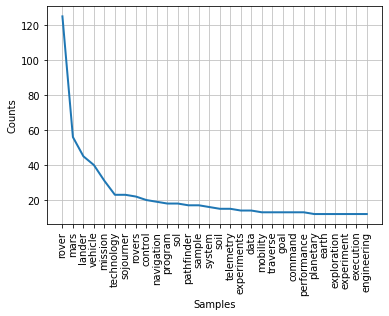

In [97]:
from nltk.probability import FreqDist
fdist = FreqDist(tokens)
fdist.most_common(5)

fdist.plot(30,cumulative=False)


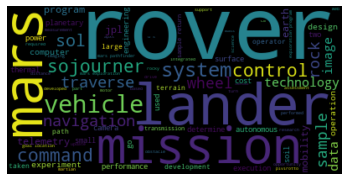

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_raw = " ".join(tokens)
wordcloud = WordCloud().generate(text_raw)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [99]:
# Лемматизация — это процесс преобразования слова в его базовую форму.
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

lemmatized_output = [lemmatizer.lemmatize(w) for w in unique]
unique_lemmatized_output = []
for word in lemmatized_output:
  if word not in unique_lemmatized_output: 
    unique_lemmatized_output.append(word)
print('Число уникальных до: ',len(lemmatized_output))
print('Число уникальных после: ',len(unique_lemmatized_output))


Число уникальных до:  1547
Число уникальных после:  1446


In [100]:
print("Сортировка по частоте")
print(fdist.most_common())
thematic_words_frec_list = [i[0] for i in fdist.most_common()]
print(thematic_words_frec_list)

# fdist = FreqDist(lemmatized_output)

print("Сортировка по длине")
print(sorted(unique_lemmatized_output, key=len, reverse = True))


Сортировка по частоте
[('rover', 125), ('mars', 56), ('lander', 45), ('vehicle', 40), ('mission', 31), ('technology', 23), ('sojourner', 23), ('rovers', 22), ('control', 20), ('navigation', 19), ('program', 18), ('sol', 18), ('pathfinder', 17), ('sample', 17), ('system', 16), ('soil', 15), ('telemetry', 15), ('experiments', 14), ('data', 14), ('mobility', 13), ('traverse', 13), ('goal', 13), ('command', 13), ('performance', 13), ('planetary', 12), ('earth', 12), ('exploration', 12), ('experiment', 12), ('execution', 12), ('engineering', 12), ('return', 11), ('computer', 11), ('autonomous', 11), ('rock', 11), ('hazard', 11), ('cost', 10), ('jpl', 10), ('wheel', 10), ('used', 10), ('landing', 10), ('design', 10), ('7', 10), ('images', 10), ('1997', 9), ('two', 9), ('power', 9), ('small', 9), ('surface', 9), ('2001', 9), ('samples', 9), ('large', 9), ('taken', 9), ('would', 9), ('also', 9), ('determine', 9), ('ram', 9), ('commands', 9), ('next', 9), ('thermal', 8), ('camera', 8), ('missio

In [101]:
thematic_words = {}
fdist_dict = dict(fdist.most_common())
for i in fdist_dict.keys():
  thematic_words[i] = (fdist_dict[i]+len(i))/2
thematic_words_sorted = sorted(thematic_words.items(), key=lambda item: item[1], reverse=True)
thematic_words_sorted_list = [i[0] for i in thematic_words_sorted]
thematic_words_sorted_dict = {i[0]:i[1] for i in thematic_words_sorted}
print("Тематика текста на основе частоты и длины")
print(thematic_words_sorted_list)

Тематика текста на основе частоты и длины
['rover', 'mars', 'lander', 'vehicle', 'mission', 'technology', 'sojourner', 'navigation', 'rovers', 'control', 'pathfinder', 'power/volume/thermal/data', 'prioritization/scheduling', 'program', 'experiments', 'telemetry', 'performance', '//www.jpl.nasa.gov/mars', 'reconstruction/recovery', 'manipulation/deployment', 'sample', 'exploration', 'engineering', 'system', 'experiment', 'experiment/instrument', 'resistance/robustness', 'sol', 'mobility', 'traverse', 'planetary', 'execution', 'autonomous', 'selection/collection', 'command', 'international', 'generation/storage/', 'soil', 'computer', 'development', 'transmission', 'configuration', 'communication', 'avoidance/response', 'data', 'determine', 'microrover', 'opportunity', 'characteristics', 'characterization', 'goal', 'earth', 'return', 'hazard', 'landing', 'commands', 'performed', 'operations', 'integrated', 'assessment', 'measurement', 'reconstruction', 'counterintuitive', 'control/mobili

3561


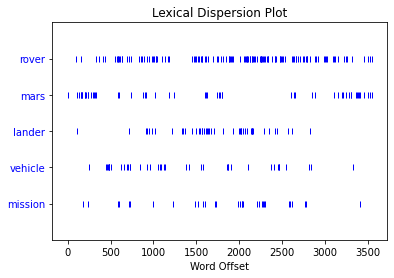

In [102]:
text = tokens

print(len(tokens))
nltk.draw.dispersion.dispersion_plot(tokens, thematic_words_frec_list[:5])

{'rover': 125, 'mars': 56, 'lander': 45, 'vehicle': 40, 'mission': 31, 'technology': 23, 'sojourner': 23, 'rovers': 22, 'control': 20, 'navigation': 19, 'program': 18, 'sol': 18, 'pathfinder': 17, 'sample': 17, 'system': 16, 'soil': 15, 'telemetry': 15, 'experiments': 14, 'data': 14, 'mobility': 13, 'traverse': 13, 'goal': 13, 'command': 13, 'performance': 13, 'planetary': 12, 'earth': 12, 'exploration': 12, 'experiment': 12, 'execution': 12, 'engineering': 12, 'return': 11, 'computer': 11, 'autonomous': 11, 'rock': 11, 'hazard': 11, 'cost': 10, 'jpl': 10, 'wheel': 10, 'used': 10, 'landing': 10, 'design': 10, '7': 10, 'images': 10, '1997': 9, 'two': 9, 'power': 9, 'small': 9, 'surface': 9, '2001': 9, 'samples': 9, 'large': 9, 'taken': 9, 'would': 9, 'also': 9, 'determine': 9, 'ram': 9, 'commands': 9, 'next': 9, 'thermal': 8, 'camera': 8, 'missions': 8, '4': 8, '1': 8, 'microrover': 8, 'development': 8, 'wheels': 8, 'built': 8, 'operator': 8, 'terrain': 8, 'path': 8, 'web': 8, 'performe

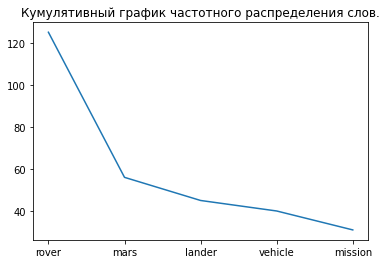

In [103]:
import matplotlib.pyplot as plt
names = []
frec = []
fdist = FreqDist(tokens)
d = {i[0]: i[1] for i in fdist.most_common()}
print(d)
for i in thematic_words_frec_list[:5]:
  names += [i]
  frec += [d[i]]

plt.plot(names, frec)
plt.title('Кумулятивный график частотного распределения слов.')
plt.show()

In [104]:
bigram_thematic_words = list(nltk.bigrams(thematic_words_frec_list[:10]))
bigram_thematic_words_list = []
for i in bigram_thematic_words:
  bigram_thematic_words_list += [(i[0], i[1])]
  bigram_thematic_words_list += [(i[1], i[0])]

def get_bigram(bigram_text):

  freq_bigram = {}
  for i in bigram_text:
    if i in bigram_thematic_words_list:
      if freq_bigram.get(i) == None:
        freq_bigram[i] = 1
      else:
        freq_bigram[i] += 1
  for i in freq_bigram:
    freq_bigram[i] = freq_bigram[i] / len(bigram_thematic_words_list)/2
  print("Оценка частотности")
  print(freq_bigram)





In [105]:
# функция для разбивки текста на 3 части
import math
def func_chunks_num(lst, c_num=3):
    n = math.ceil(len(lst) / c_num)

    for x in range(0, len(lst), n):
        e_c = lst[x : n + x]

        if len(e_c) < n:
            e_c = e_c + ['' for y in range(n - len(e_c))]
        yield e_c

bigram_all_text = list(nltk.bigrams(tokens))

parts = list(func_chunks_num(bigram_all_text))
print('Часть 1')
get_bigram(parts[0])
print('Часть 2')
get_bigram(parts[1])
print('Часть 3')
get_bigram(parts[2])




Часть 1
Оценка частотности
{('navigation', 'control'): 0.027777777777777776, ('mars', 'rover'): 0.027777777777777776}
Часть 2
Оценка частотности
{('technology', 'mission'): 0.027777777777777776, ('mission', 'technology'): 0.027777777777777776}
Часть 3
Оценка частотности
{('navigation', 'control'): 0.05555555555555555, ('mars', 'rover'): 0.08333333333333333, ('rover', 'mars'): 0.027777777777777776}


In [107]:
#Пример синтаксиеского анализа
# анализирую 22-е предложение

from textblob import TextBlob
from nltk import CFG

space_words = open('/content/sample_data/space_text.txt')
text = space_words.read()
suggestion = nltk.sent_tokenize(text)[22]
blob_object = TextBlob(suggestion) 

cfg = {}
for i in blob_object.tags:
  if cfg.get(i[1]) == None:
    cfg[i[1]] = [i[0]]
  else:
    cfg[i[1]] += [i[0]]

cfg_str = ""
for i in cfg.keys():
  b = '" | "'.join(cfg[i])
  cfg_str += f"""{i} -> \"{b}\"\n"""
print(cfg_str)

DT -> "The" | "the" | "the"
NN -> "ability" | "surface"
TO -> "to" | "to"
VB -> "move"
IN -> "about"
JJ -> "Martian" | "key"
VBZ -> "is"
NNP -> "Mars" | "Exploration" | "Program"

